In [1]:
import pandas as pd
import numpy as np
import time
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
DC_Week1 = pd.read_pickle("DC_Week1")
DC_Week2 = pd.read_pickle("DC_Week2")
MC_Week1 = pd.read_pickle("MC_Week1")
MC_Week2 = pd.read_pickle("MC_Week2")
cases = pd.read_csv('/Users/brandon/Documents/UCL/Project/COVID Project/Data/data_2021-Aug-29.csv', usecols = ['date','newCasesByPublishDate'])

In [3]:
DC_cases = cases[14:29]
DC_cases = DC_cases.sort_values(by = ['date'])
DC_cases = DC_cases.reset_index(drop=True)
MC_cases = cases[0:14]
MC_cases = MC_cases.sort_values(by = ['date'])
MC_cases = MC_cases.reset_index(drop=True)

In [4]:
DC_cases

,date,newCasesByPublishDate
0,2020-05-26,2004
1,2020-05-27,2013
2,2020-05-28,1887
3,2020-05-29,2095
4,2020-05-30,2445
5,2020-05-31,1936
6,2020-06-01,1570
7,2020-06-02,1613
8,2020-06-03,1871
9,2020-06-04,1805


In [5]:
DC_Data = DC_Week1.append(DC_Week2)
MC_Data = MC_Week1.append(MC_Week2)

In [6]:
sentiment_avg = DC_Data.groupby('created_at')['Compound'].mean()
sentiment_avgg = list(sentiment_avg)
print(sentiment_avg)
daily_tweets = DC_Data.groupby('created_at').size()
print(daily_tweets)

created_at
2020-05-26 00:00:00+00:00    0.000035
2020-05-27 00:00:00+00:00    0.038925
2020-05-28 00:00:00+00:00   -0.106617
2020-05-29 00:00:00+00:00   -0.001779
2020-05-30 00:00:00+00:00   -0.063539
2020-05-31 00:00:00+00:00   -0.032851
2020-06-01 00:00:00+00:00    0.029516
2020-06-02 00:00:00+00:00   -0.011872
2020-06-04 00:00:00+00:00   -0.063605
2020-06-05 00:00:00+00:00   -0.176945
2020-06-06 00:00:00+00:00   -0.099667
2020-06-07 00:00:00+00:00    0.015395
2020-06-08 00:00:00+00:00    0.059470
2020-06-09 00:00:00+00:00    0.033586
Name: Compound, dtype: float64
created_at
2020-05-26 00:00:00+00:00     321
2020-05-27 00:00:00+00:00     708
2020-05-28 00:00:00+00:00    1187
2020-05-29 00:00:00+00:00     452
2020-05-30 00:00:00+00:00     119
2020-05-31 00:00:00+00:00     212
2020-06-01 00:00:00+00:00     374
2020-06-02 00:00:00+00:00      57
2020-06-04 00:00:00+00:00      38
2020-06-05 00:00:00+00:00     216
2020-06-06 00:00:00+00:00     142
2020-06-07 00:00:00+00:00     111
2020-06

In [7]:
DC_Data['created_at'].unique()

<DatetimeArray>
['2020-05-26 00:00:00+00:00', '2020-05-27 00:00:00+00:00',
 '2020-05-28 00:00:00+00:00', '2020-05-29 00:00:00+00:00',
 '2020-05-30 00:00:00+00:00', '2020-05-31 00:00:00+00:00',
 '2020-06-01 00:00:00+00:00', '2020-06-02 00:00:00+00:00',
 '2020-06-04 00:00:00+00:00', '2020-06-05 00:00:00+00:00',
 '2020-06-06 00:00:00+00:00', '2020-06-07 00:00:00+00:00',
 '2020-06-08 00:00:00+00:00', '2020-06-09 00:00:00+00:00']
Length: 14, dtype: datetime64[ns, UTC]

(-0.2, 0.2)

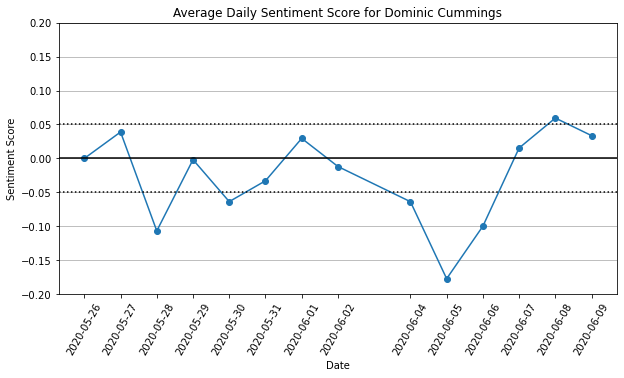

In [8]:
plt.figure(figsize=[10, 5])
plt.plot(sentiment_avg, marker='o')
plt.grid(axis = 'y')
plt.axhline(y = 0.05, color = 'black', linestyle = ':')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -0.05, color = 'black', linestyle = ':')
plt.title("Average Daily Sentiment Score for Dominic Cummings")
plt.xticks(rotation = 60)
plt.xticks(DC_Data['created_at'].unique())
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Sentiment Score', fontsize = 10)
plt.ylim([-0.2, 0.2])

Text(0, 0.5, '# of Cases')

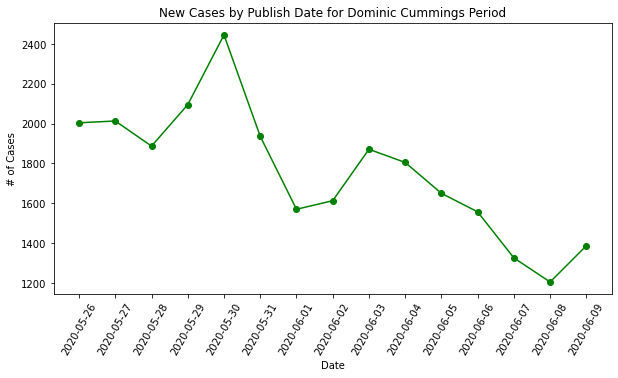

In [9]:
plt.figure(figsize=[10, 5])
plt.plot(DC_cases['date'], DC_cases['newCasesByPublishDate'], marker='o', color ='g')
plt.title("New Cases by Publish Date for Dominic Cummings Period")
plt.xticks(rotation = 60)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('# of Cases', fontsize = 10)

In [10]:
sentiment_avg2 = MC_Data.groupby('created_at')['Compound'].mean()
print(sentiment_avg2)
daily_tweets2 = MC_Data.groupby('created_at').size()
print(daily_tweets2)

created_at
2021-06-27 00:00:00+00:00    0.018312
2021-06-28 00:00:00+00:00    0.043980
2021-06-29 00:00:00+00:00    0.023971
2021-06-30 00:00:00+00:00    0.052263
2021-07-01 00:00:00+00:00    0.027372
2021-07-02 00:00:00+00:00    0.118723
2021-07-03 00:00:00+00:00    0.234124
2021-07-04 00:00:00+00:00    0.066590
2021-07-05 00:00:00+00:00   -0.266469
2021-07-06 00:00:00+00:00   -0.134104
2021-07-07 00:00:00+00:00   -0.429712
2021-07-08 00:00:00+00:00    0.157700
2021-07-09 00:00:00+00:00   -0.080986
2021-07-10 00:00:00+00:00   -0.056925
Name: Compound, dtype: float64
created_at
2021-06-27 00:00:00+00:00     43
2021-06-28 00:00:00+00:00    396
2021-06-29 00:00:00+00:00    202
2021-06-30 00:00:00+00:00     54
2021-07-01 00:00:00+00:00     32
2021-07-02 00:00:00+00:00     31
2021-07-03 00:00:00+00:00     21
2021-07-04 00:00:00+00:00     20
2021-07-05 00:00:00+00:00     13
2021-07-06 00:00:00+00:00     24
2021-07-07 00:00:00+00:00     33
2021-07-08 00:00:00+00:00      6
2021-07-09 00:00:00

(-0.5, 0.5)

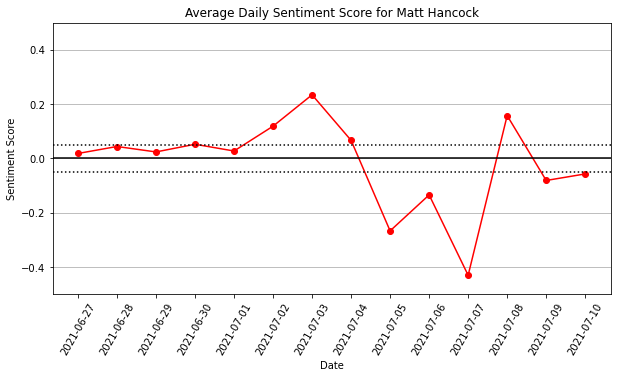

In [11]:
plt.figure(figsize=[10, 5])
plt.plot(sentiment_avg2, color = 'red', marker='o')
plt.grid(axis = 'y')
plt.axhline(y = 0.05, color = 'black', linestyle = ':')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = -0.05, color = 'black', linestyle = ':')
plt.title("Average Daily Sentiment Score for Matt Hancock")
plt.xticks(rotation = 60)
plt.xticks(MC_Data['created_at'].unique())
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Sentiment Score', fontsize = 10)
plt.ylim([-0.5, 0.5])

Text(0, 0.5, '# of Cases')

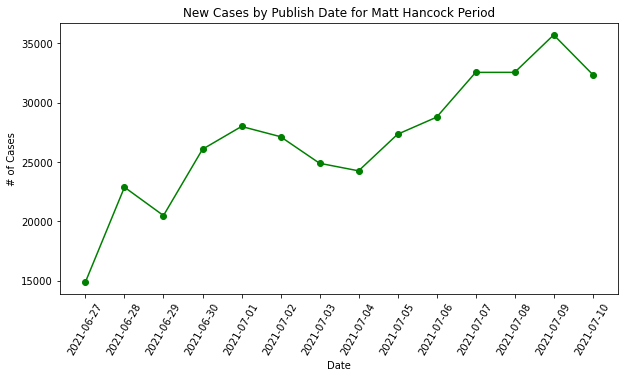

In [12]:
plt.figure(figsize=[10, 5])
plt.plot(MC_cases['date'], MC_cases['newCasesByPublishDate'], marker='o', color ='g')
plt.title("New Cases by Publish Date for Matt Hancock Period")
plt.xticks(rotation = 60)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('# of Cases', fontsize = 10)